In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import pandas as pd

In [113]:
import sklearn.metrics
import mir_eval

In [114]:
import cPickle as pickle

In [115]:
np.set_printoptions(precision=3)
seaborn.set(style='darkgrid')

In [133]:
def plot_curve(file='', intervals=None, labels=None, scores=None):
    
    label_agreement = np.zeros((len(labels), len(labels)), dtype=bool)
    
    for i in range(len(labels)):
        for j in range(i, len(labels)):
            label_agreement[i, j] = (labels[i] == labels[j])
            label_agreement[j, i] = label_agreement[i, j]
    
    # FIXME: suppress the diagonal
    # ... or throw out the bottom triangle
    label_agreement[np.tril_indices_from(label_agreement, k=0)] = False
    
    label_disagreement = ~label_agreement
    
    label_disagreement[np.tril_indices_from(label_disagreement, k=0)] = False
    
    tp_scores = scores[label_agreement]
    fp_scores = scores[label_disagreement]
    
    num_pos = np.sum(label_agreement)
    num_neg = np.sum(label_disagreement)
    
    y_true = np.concatenate([np.zeros(len(tp_scores)), np.ones(len(fp_scores))])
    y_score = np.concatenate([tp_scores, fp_scores])
    
    fpr, tpr, thr = sklearn.metrics.roc_curve(y_true, y_score)
    
    tp = num_pos * tpr
    fp = num_neg * fpr
    
    precision = tp / (tp + fp)
    recall = tpr
    
    fmeasure = np.asarray([mir_eval.util.f_measure(p, r) for p, r in zip(precision, recall)])
    
    k = np.argmax(fmeasure)
    thr_opt = thr[k]
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1,3,1)
    plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.5)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr[k], tpr[k], color='r', marker='*', markersize=10, alpha=0.5)
    
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(file)
    
    plt.subplot(1,3,2)
    plt.plot(precision, recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    
    plt.subplot(1,3,3)
    plt.plot(thr, fmeasure)
    k = np.argmax(fmeasure)
    plt.plot(thr[k], fmeasure[k], marker='*', markersize=10, alpha=0.5, color='r')
    
    plt.xlabel(r'$\theta$')
    plt.ylabel('$F_1$')
    plt.tight_layout()

In [80]:
vars().update(pickle.load(open('../data/scores_datasetESALAMI_levelElarge_scale_distEL2.pk', 'r')))

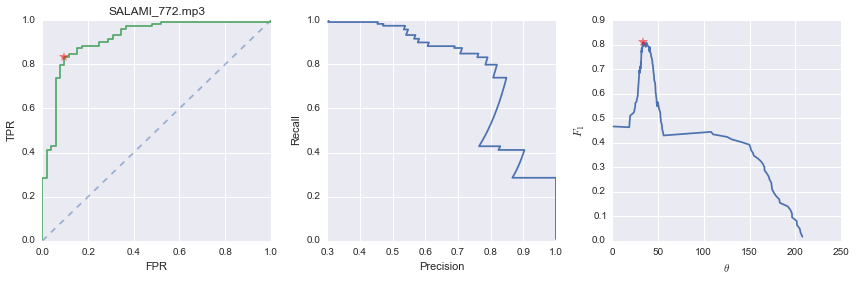

In [135]:
plot_curve(**file_scores[23])